In [1]:
import torch
import dlc_practical_prologue as prologue
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from torch import nn
from torch.nn import functional as F
from utils import load_data, width_visualization

In [2]:
train_input, train_target, train_classes, test_input, test_target, test_classes = load_data()

In [3]:
class FCN(nn.Module):
    def __init__(self, nLayers, nParams=70000, in_=14*14, out_=10):
        super(FCN, self).__init__()
        self.nLayers = nLayers
        self.nParams = nParams
        self.in_ = in_
        self.out_ = out_
        self.hidden = self.get_params(nLayers, nParams, in_, out_)
        
        print(f'Width for {self.nParams} parameters in a {self.nLayers}-layer FCN: {self.hidden}')
        
        self.fcn = self.create_net()
        print(f'Parameters: {self.count_params()}')

    def create_net(self):
        '''
        Create network of given depth given default parameters
        N: number of parameters in model
        D: number of input channels
        T: number of output channels
        '''      
        layers = []     
        in_ = self.in_
        
        for i in range(self.nLayers):
            layers.extend([nn.Linear(in_, self.hidden), nn.ReLU(), nn.Dropout(0.2)])
            in_ = self.hidden
        
        # Output layer
        layers.append(nn.Linear(self.hidden, self.out_))        
        return nn.Sequential(*layers)        
    
    def forward(self, x):
        assert(len(x.shape) == 4) # Input must be 4D
        out = torch.zeros((x.shape[0], x.shape[1], self.out_))
        
        for i in range(x.shape[1]):
            out[:,i,:] = self.fcn(x[:,i,:,:].view(-1, 14*14))
        return out
    
    def count_params(self):
        return sum(p.numel() for p in self.parameters())
    
    @staticmethod
    def get_params(L, N, D, T):
        # Solve: N = (L-1)*H^2 + (D+T+L)*H+T    
        a = L-1
        b = D+T+L
        c = T-N

        s = pow(b**2-4*a*c, 0.5)
        return round((-b+s)/(2*a))

In [4]:
net = FCN(5)

Width for 70000 parameters in a 5-layer FCN: 109
Parameters: 70533


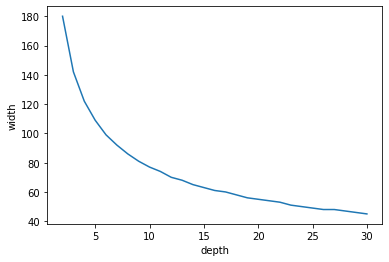

In [5]:
width_visualization()